In [19]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter
import CADMium

In [20]:
dis_eq      = np.linspace(0.5,5,30)
dis_st      = np.linspace(5.1,10,10)
distances   = np.concatenate((dis_eq, dis_st))

# distances = [8]

energy    = []

Za, Zb = 1,1
pol = 2
NP, NM = 7, [6,6]
loc = np.array(range(-4,5))


for d in distances:
    a = d/2    
    L = np.arccosh(10/a)
    grid = Psgrid(NP, NM, a, L, loc)
    grid.initialize()

    Nmo_a = [[1,0]]; Nmo_A = [[0,1]]  # Alpha fragment
    N_a   = [[1,0]]; N_A   = [[0,1]]
    nu_a = 0.5

    Nmo_b = [[1,0]]; Nmo_B = [[0,1]] # Beta fragment
    N_b   = [[1,0]]; N_B   = [[0,1]] 
    nu_b = 0.5

    Nmo_m = [[1,1]] #Molecular elctron configuration
    N_m   = [[1,1]]


    part = Partition(grid, Za, Zb, pol, [Nmo_a, Nmo_A], [N_a, N_A], nu_a, [Nmo_b, Nmo_B], [N_b, N_B], nu_b, {  "AB_SYM"            : True,
                                                                                                               "interaction_type"  : "dft", 
                                                                                                               "kinetic_part_type" : "libxcke",
                                                                                                               "hxc_part_type"     : "overlap_hxc",
                                                                                                               "k_family"          : "gga", 
                                                                                                               "ke_func_id"        : 500,
                                                                                                                 })

    #Setup inverter object
    mol_solver = Pssolver(grid, Nmo_m, N_m)
    part.inverter = Inverter(grid, mol_solver, {  "AB_SYM"         : True, 
                                                  "use_iterative"  : False,
                                                  "invert_type"    : "wuyang",
                                                  "disp"           : True,  
                                                })

    part.optPartition.isolated = True
    part.scf({"disp"  : False,
              "alpha" : [0.6],
              "e_tol" : 1e-6})

    part.optPartition.isolated   = False
    part.scf({"disp"       : False,
              "alpha"      : [0.6],
              "max_iter"   : 20,
              "e_tol"      : 1e-6,
              "iterative"  : False,
              "continuing" : True})
    
    energy.append(part.E.E)
    print(f"Done with {d}")
    
energy    = np.array(energy)
np.save('h2_distance.npy', distances)
np.save('h2_overlap.npy', energy)

Done with 0.5
Done with 0.6551724137931034
Done with 0.8103448275862069
Done with 0.9655172413793104
Done with 1.1206896551724137
Done with 1.2758620689655173
Done with 1.4310344827586208
Done with 1.5862068965517242
Done with 1.7413793103448276
Done with 1.896551724137931
Done with 2.0517241379310347
Done with 2.206896551724138
Done with 2.3620689655172415
Done with 2.5172413793103448
Done with 2.6724137931034484
Done with 2.8275862068965516
Done with 2.9827586206896552
Done with 3.137931034482759
Done with 3.293103448275862
Done with 3.4482758620689657
Done with 3.603448275862069
Done with 3.7586206896551726
Done with 3.913793103448276
Done with 4.068965517241379
Done with 4.224137931034483
Done with 4.379310344827586
Done with 4.5344827586206895
Done with 4.689655172413794
Done with 4.844827586206897
Done with 5.0
Done with 5.1
Done with 5.644444444444444
Done with 6.188888888888888
Done with 6.733333333333333
Done with 7.277777777777778
Done with 7.822222222222222
Done with 8.36666

(-0.2, 0.1)

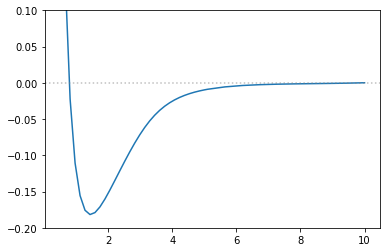

In [26]:
h_energy = part.E.Ea
plt.plot(distances, energy - 2.0 * h_energy)
plt.axhline(y=0, alpha=0.5, c="grey", ls=":")
plt.ylim(-.2,.1)

In [24]:
part.E.Eapart.E.Ea

-0.47790086199331666